<a href="https://colab.research.google.com/github/Anonymousundefined/ML/blob/main/multivariabe_regression%2Bgradual_descent_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
!pip install word2number
from word2number import w2n


In [ ]:
df=pd.read_csv("/content/hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
mid=df['test_score(out of 10)'].median()

In [ ]:
mid

8.0

In [ ]:
df['test_score(out of 10)'] =df['test_score(out of 10)'].fillna(mid)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
df.experience=df['experience'].fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
df['experience'] = df['experience'].apply(w2n.word_to_num)


In [ ]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg=linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [ ]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg.predict([[0,7.0,9]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50504.36681223])

In [ ]:
df['experience']

0     0
1     0
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience, dtype: int64

In [ ]:
import numpy as np

def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.08

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

m 4.96, b 1.44, cost 89.0 iteration 0
m 0.4991999999999983, b 0.26879999999999993, cost 71.10560000000002 iteration 1
m 4.451584000000002, b 1.426176000000001, cost 56.8297702400001 iteration 2
m 0.892231679999997, b 0.5012275199999995, cost 45.43965675929613 iteration 3
m 4.041314713600002, b 1.432759910400001, cost 36.35088701894832 iteration 4
m 1.2008760606719973, b 0.7036872622079998, cost 29.097483330142282 iteration 5
m 3.7095643080294423, b 1.4546767911321612, cost 23.307872849944438 iteration 6
m 1.4424862661541864, b 0.881337636696883, cost 18.685758762535738 iteration 7
m 3.4406683721083144, b 1.4879302070713722, cost 14.994867596913156 iteration 8
m 1.6308855378034224, b 1.0383405553279617, cost 12.046787238456794 iteration 9
m 3.2221235247119777, b 1.5293810083298451, cost 9.691269350698109 iteration 10
m 1.7770832372205707, b 1.1780607551353204, cost 7.8084968312098315 iteration 11
m 3.0439475772474127, b 1.5765710804477953, cost 6.302918117062937 iteration 12
m 1.8898457

In [ ]:
import pickle

In [ ]:
with open('model_pickle','wb') as f:
  pickle.dump(reg,f)

In [ ]:
with open('model_pickle','rb') as f:
  mj=pickle.load(f)

In [ ]:
mj.predict([[2,4.0,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([43977.43813683])

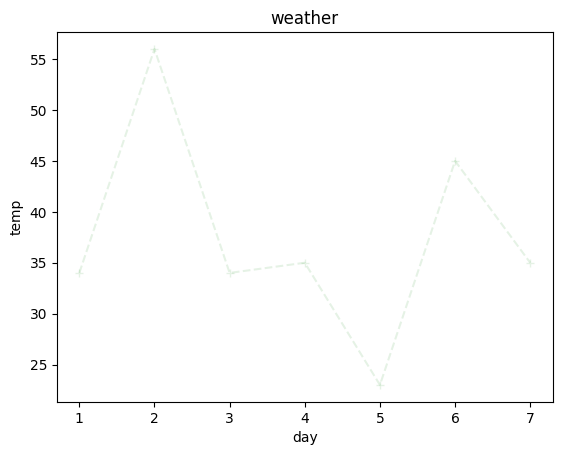

In [ ]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5,6,7]
y=[34,56,34,35,23,45,35]
plt.xlabel('day')
plt.ylabel('temp')
plt.title('weather')
plt.plot(x,y,'g+--',alpha=0.1)

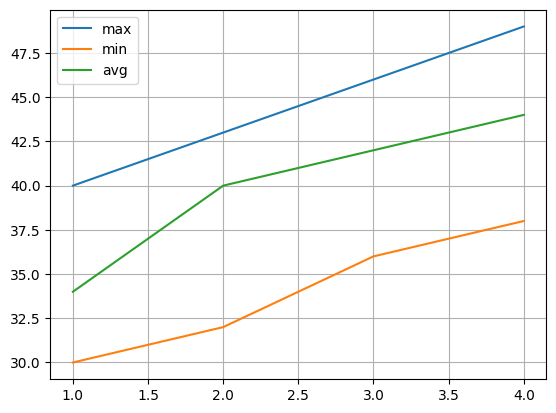

In [ ]:
import matplotlib.pyplot as plt
day=[1,2,3,4]
max=[40,43,46,49]
min=[30,32,36,38]
avg=[34,40,42,44]
plt.plot(day,max,label="max")
plt.plot(day,min,label="min")
plt.plot(day,avg,label="avg")
plt.legend(loc="best")
plt.grid()

<BarContainer object of 4 artists>

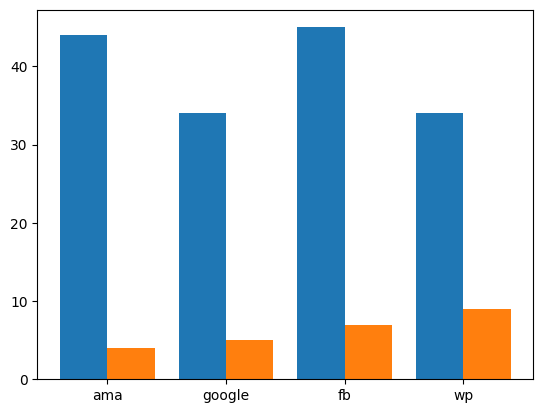

In [ ]:
import matplotlib.pyplot as plt
company=['ama',"google","fb","wp"]
revenue=[44,34,45,34]
ypos=np.arange(len(company))
plt.xticks(ypos,company)

profit=[4,5,7,9]
plt.bar(ypos-0.2,revenue,width=0.4,label="revenue")
plt.bar(ypos+0.2,profit,width=0.4,label="profit")

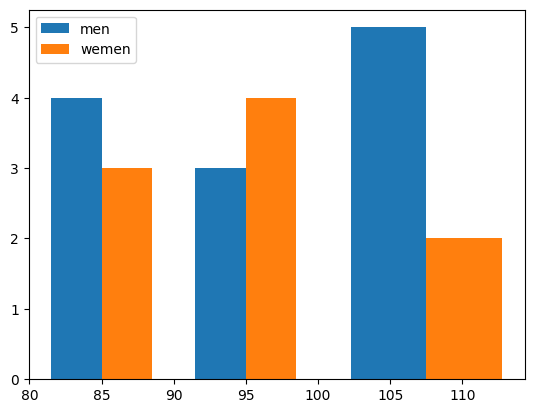

In [ ]:
import matplotlib.pyplot as plt
blood_sugarm=[100,84,88,98,103,112,124,84,99,90,88,112,112]
blood_sugarw=[88,89,90,98,83,102,103,90,91]
plt.hist([blood_sugarm,blood_sugarw],bins=[80,90,100,115],rwidth=0.7,label=['men','wemen'])
plt.legend()


Text(0.5, 1.0, 'revenue')

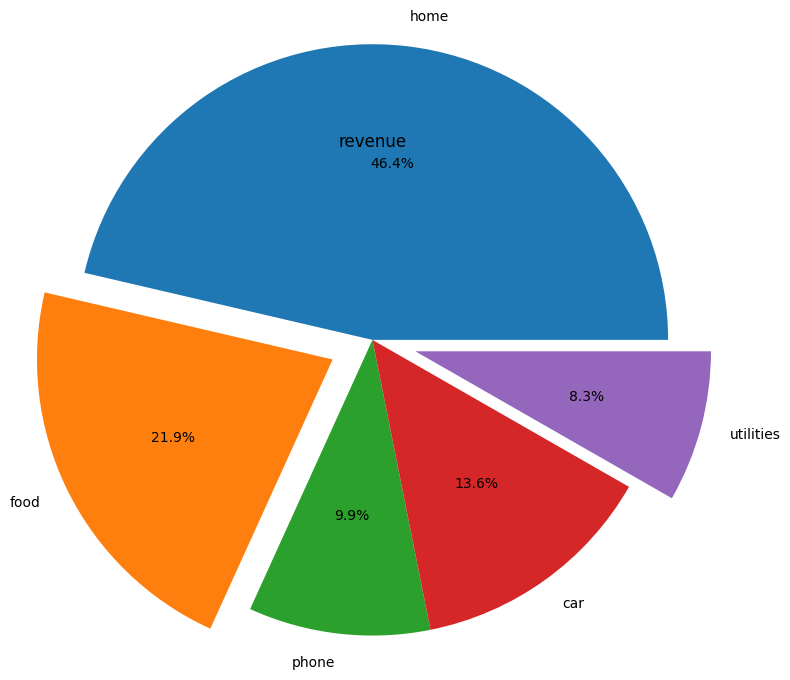

In [ ]:
import matplotlib.pyplot as plt
exp_vals=[1400,660,300,410,250]
exp_labels=["home","food","phone","car","utilities"]
plt.pie(exp_vals,labels=exp_labels,autopct='%0.1f%%',radius=2,explode=[0,0.3,0,0,0.3])
plt.title('revenue')